# Import processed dataset

In [1]:
#Importing Base Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import pickle
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
#Importing the dataset
df = pd.read_csv(r'C:\Users\Deep Joshi\Desktop\Data Analysis\Machine Learning\Income Prediction\data\processed\CensusDataProcessed.csv')
df.head()

,Age,Work Class,Final Weight,Education Number,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours/Week,Counrty,Income
0,42,Private,116632.0,16,Married,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
1,43,Federal-gov,410867.0,16,Independent,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
2,29,Private,133937.0,16,Independent,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
3,50,Self-emp-inc,195322.0,16,Independent,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,>50K
4,35,Private,292472.0,16,Married,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,Taiwan,>50K


In [3]:
df.isnull().any()

Age                 False
Work Class          False
Final Weight        False
Education Number    False
Marital Status      False
Occupation          False
Relationship        False
Race                False
Gender              False
Capital Gain        False
Capital Loss        False
Hours/Week          False
Counrty             False
Income              False
dtype: bool

In [4]:
df.loc[df['Income'] == " >50K" , 'Income'  ] = " 1"
df.loc[df['Income'] == " <=50K" , 'Income'  ] = " 0"
df['Income'] = pd.to_numeric(df['Income'],errors='coerce')
df.head(1)

,Age,Work Class,Final Weight,Education Number,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours/Week,Counrty,Income
0,42,Private,116632.0,16,Married,Prof-specialty,Husband,White,Male,0,0,45,United-States,1


# Pearson's Correlation Coefficient

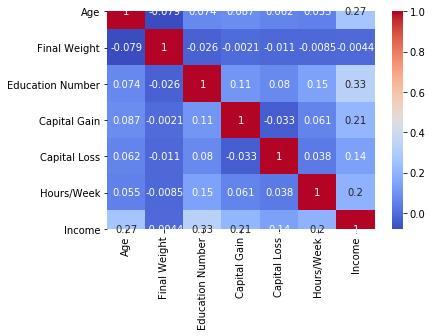

In [5]:
#Checking for multicollinearity and feature selection
sns.heatmap(df.corr(),
            cmap='coolwarm',
            annot=True);
# We can see that Final Weight has negligible value and we can remove it from dataset.
# Furthermore,from the feature description,it is not useful to us as it refers to only the sampling in the census conducted and has no practical effect on the target feature 

In [6]:
#Dropping Final Weight
df=df.drop(['Final Weight'],axis=1)

In [7]:
df.head(5)

,Age,Work Class,Education Number,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours/Week,Counrty,Income
0,42,Private,16,Married,Prof-specialty,Husband,White,Male,0,0,45,United-States,1
1,43,Federal-gov,16,Independent,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,1
2,29,Private,16,Independent,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
3,50,Self-emp-inc,16,Independent,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,1
4,35,Private,16,Married,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,Taiwan,1


# Categorical Feature Encoding

In [8]:
#Work Class
df1=df
dummyWC = pd.get_dummies(df1['Work Class']) 
df1 = pd.concat([df1,dummyWC],axis=1)
df1 = df1.drop('Work Class',axis=1)
df1.head(1)

,Age,Education Number,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours/Week,Counrty,Income,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,42,16,Married,Prof-specialty,Husband,White,Male,0,0,45,United-States,1,0,0,0,1,0,0,0,0


In [9]:
dummyGender = pd.get_dummies(df1['Gender']) 
df1 = pd.concat([df1,dummyGender],axis=1)
df1 = df1.drop('Gender',axis=1)
df1.head(1)

,Age,Education Number,Marital Status,Occupation,Relationship,Race,Capital Gain,Capital Loss,Hours/Week,Counrty,...,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Female,Male
0,42,16,Married,Prof-specialty,Husband,White,0,0,45,United-States,...,0,0,0,1,0,0,0,0,0,1


In [10]:
dummyMS = pd.get_dummies(df1['Marital Status']) 
df1 = pd.concat([df1,dummyMS],axis=1)
df1 = df1.drop('Marital Status',axis=1)
df1.head(1)

,Age,Education Number,Occupation,Relationship,Race,Capital Gain,Capital Loss,Hours/Week,Counrty,Income,...,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Female,Male,Independent,Married
0,42,16,Prof-specialty,Husband,White,0,0,45,United-States,1,...,0,1,0,0,0,0,0,1,0,1


In [11]:
dummyR = pd.get_dummies(df1['Race']) 
df1 = pd.concat([df1,dummyR],axis=1)
df1 = df1.drop('Race',axis=1)
df1.head(1)

,Age,Education Number,Occupation,Relationship,Capital Gain,Capital Loss,Hours/Week,Counrty,Income,Federal-gov,...,Without-pay,Female,Male,Independent,Married,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,42,16,Prof-specialty,Husband,0,0,45,United-States,1,0,...,0,0,1,0,1,0,0,0,0,1


In [12]:
df1['Income'].unique()

array([1, 0], dtype=int64)

In [13]:
df2=df1
categorical = ['Occupation', 'Relationship','Counrty']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        df2[feature] = le.fit_transform(df2[feature])
df2.head(1)

,Age,Education Number,Occupation,Relationship,Capital Gain,Capital Loss,Hours/Week,Counrty,Income,Federal-gov,...,Without-pay,Female,Male,Independent,Married,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,42,16,9,0,0,0,45,38,1,0,...,0,0,1,0,1,0,0,0,0,1


In [14]:
X = df2
X = X.drop('Income',axis=1)
Y = df2['Income']
X.head()

,Age,Education Number,Occupation,Relationship,Capital Gain,Capital Loss,Hours/Week,Counrty,Federal-gov,Local-gov,...,Without-pay,Female,Male,Independent,Married,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,42,16,9,0,0,0,45,38,0,0,...,0,0,1,0,1,0,0,0,0,1
1,43,16,9,1,0,0,50,38,1,0,...,0,1,0,1,0,0,0,0,0,1
2,29,16,9,3,0,0,40,38,0,0,...,0,0,1,1,0,0,0,0,0,1
3,50,16,9,1,0,0,40,38,0,0,...,0,0,1,1,0,0,0,0,0,1
4,35,16,9,0,0,0,40,35,0,0,...,0,0,1,0,1,0,1,0,0,0


# Train-Test Split

In [15]:
# Dividing into 80-20 Ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [16]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
X_train.head()

,Age,Education Number,Occupation,Relationship,Capital Gain,Capital Loss,Hours/Week,Counrty,Federal-gov,Local-gov,...,Without-pay,Female,Male,Independent,Married,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.863345,1.198808,0.775789,-0.856957,-0.14782,-0.221392,-0.398668,0.241272,5.139065,-0.277334,...,-0.012869,-0.678024,0.678024,-1.042980,1.042980,-0.096744,-0.180555,-0.340463,-0.085012,0.423198
1,-0.711456,2.106474,0.775789,1.014139,-0.14782,-0.221392,-0.398668,0.241272,-0.194588,-0.277334,...,-0.012869,1.474874,-1.474874,0.958791,-0.958791,-0.096744,5.538486,-0.340463,-0.085012,-2.362959
2,-0.711456,1.652641,0.775789,-0.856957,-0.14782,-0.221392,2.082976,-3.231231,-0.194588,-0.277334,...,-0.012869,-0.678024,0.678024,-1.042980,1.042980,-0.096744,5.538486,-0.340463,-0.085012,-2.362959
3,1.029113,-0.162692,1.269544,-0.856957,-0.14782,-0.221392,2.082976,0.241272,-0.194588,-0.277334,...,-0.012869,-0.678024,0.678024,-1.042980,1.042980,-0.096744,-0.180555,-0.340463,-0.085012,0.423198
4,0.946229,-0.616525,-0.705478,1.637837,-0.14782,-0.221392,1.586647,-0.453229,-0.194588,-0.277334,...,-0.012869,1.474874,-1.474874,0.958791,-0.958791,-0.096744,5.538486,-0.340463,-0.085012,-2.362959


# Training on various base models

In [17]:
import xgboost
models = []

models.append(('LOGISTIC REGRESSION', LogisticRegression()))
models.append(('DECISION TREE - ENTROPY CRITERION', DecisionTreeClassifier(criterion = "entropy", max_depth = 8 )))
models.append(('DECISION TREE - GINI CRITERION', DecisionTreeClassifier(criterion = "gini", max_depth = 8 )))
models.append(('KNN', KNeighborsClassifier(n_neighbors=8)))
models.append(('RANDOM FOREST', RandomForestClassifier(n_estimators=100,bootstrap=True)))
models.append(('XGBOOST',xgboost.XGBClassifier()))

results = []
names = []
accuracy = []
roc = []
scoring = 'accuracy'
for name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy.append((name,accuracy_score(y_test, y_pred)*100))
    
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    roc.append((name,roc_auc))
    
    
    
    
    
    #with open(r'C:\Users\Deep Joshi\Desktop\Data Analysis\Machine Learning\Income Prediction\models\model_pickle_{}'.format(name),'wb') as f:
    #    pickle.dump(model,f)
    
    
print("Accuracy from each models :\n")
print(accuracy)
print(roc)
print("Maximum accuracy is given by : \n")
print(max(accuracy))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy from each models :

[('LOGISTIC REGRESSION', 83.68653421633555), ('DECISION TREE - ENTROPY CRITERION', 84.67991169977925), ('DECISION TREE - GINI CRITERION', 84.79028697571745), ('KNN', 81.8543046357616), ('RANDOM FOREST', 83.6644591611479), ('XGBOOST', 86.24724061810156)]
[('LOGISTIC REGRESSION', 0.8904535328392599), ('DECISION TREE - ENTROPY CRITERION', 0.8930816487789579), ('DECISION TREE - GINI CRITERION', 0.8948734774671167), ('KNN', 0.8599533639481907), ('RANDOM FOREST', 0.8829618818888455), ('XGBOOST', 0.9219236944117162)]
Maximum accuracy is given by : 

('XGBOOST', 86.24724061810156)


# Optimizing XGBoost 

In [18]:
# Now since XGBoost is able to predict values of test set  more correctly than other models, lets try to optimize it more
import xgboost
params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma": [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.6,0.7]
}

classifier = xgboost.XGBClassifier()
random_search = RandomizedSearchCV(classifier, param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   56.6s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                           verbosity=None),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                               

In [19]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [20]:
random_search.best_score_

0.9186180583145599

In [21]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.15,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

# Final Model Creation

In [22]:

# Now we will build final model based on the parameters returned by RandomizedSearchCV
import xgboost
xgboost = xgboost.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=5, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [23]:
train_x = X_train.values
train_y = y_train.values
test_x = X_test.values
test_y = y_test.values
final_model = xgboost.fit(train_x,train_y)
y_pred_optimized = final_model.predict(test_x)
print('Accuracy Score:\n')
print(accuracy_score(test_y,y_pred_optimized)*100)
print('ROC-AUC Score:\n')
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)



Accuracy Score:

86.15894039735099
ROC-AUC Score:

0.9219236944117162


In [24]:
testing = pd.DataFrame([19,9,7,2,0,0,25,38,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1])
testing = testing.values.reshape(1,25)
print(final_model.predict(testing))

[0]


# Performance Evaluation 

In [25]:
print('XGBoost accuracy score with all features: {0:0.4f} %'. format(accuracy_score(test_y, y_pred_optimized)*100))

print("Precision:",metrics.precision_score(test_y, y_pred_optimized))
print("Recall:",metrics.recall_score(test_y, y_pred_optimized))

cnf_matrix_xgb = metrics.confusion_matrix(test_y, y_pred_optimized)
print("\nConfusion Matrix : ")
print(cnf_matrix_xgb)


XGBoost accuracy score with all features: 86.1589 %
Precision: 0.7909371781668383
Recall: 0.6442953020134228

Confusion Matrix : 
[[3135  203]
 [ 424  768]]


# Saving the Model

In [26]:
with open(r'C:\Users\Deep Joshi\Desktop\Data Analysis\Machine Learning\Income Prediction\models\model_pickle_optimized_XGBoost','wb') as f:
        pickle.dump(final_model,f)